In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

%matplotlib inline

In [18]:
model = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/word2vec_skip/skip_s100.txt')

In [32]:
word_list = ['Homem', 'Mulher', 'Rei', 'Rainha', 'Maçã', 'Laranja']

In [53]:
def plot(model, word_list):

    words = []
    embeddings = []

    # for word in list(model.wv.vocab):
    for word in word_list:
        embeddings.append(model[word.lower()])
        words.append(word.lower())

    tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_2d = tsne_2d.fit_transform(embeddings)

    def tsne_plot_2d(label, embeddings, words=[]):
        plt.figure(figsize=(16, 9))
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, label=label)
        for i, word in enumerate(words):
            plt.annotate(word.lower(), xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=10)
        plt.legend(loc=4)
        plt.grid(True)
        plt.show()

    tsne_plot_2d('Visualização de Word Embeddings', embeddings_2d, words)

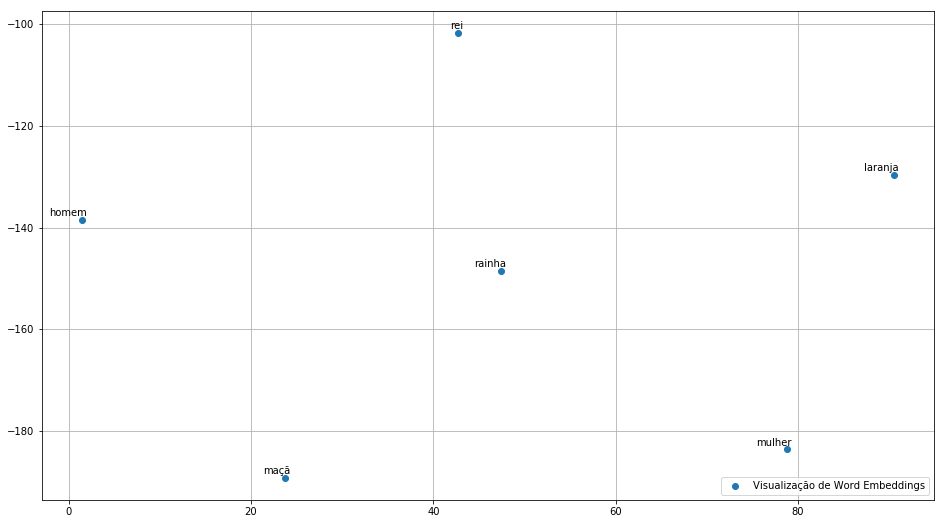

In [54]:
plot(model, word_list)

In [23]:
model.most_similar(positive=['rei', 'homem'], negative=['rainha'], topn=10)

[('demónio', 0.6855391263961792),
 ('intruso', 0.659054160118103),
 ('estereotipo', 0.6565697193145752),
 ('povo', 0.6493959426879883),
 ('vaticínio', 0.6420562267303467),
 ('salteador', 0.639818549156189),
 ('torcionário', 0.635098397731781),
 ('sanguinário', 0.635047197341919),
 ('facínora', 0.6344645619392395),
 ('fugitivo', 0.6343000531196594)]

In [24]:
model.most_similar(positive=['rei', 'homem'], negative=['mulher'], topn=10)

[('conquistador', 0.695933997631073),
 ('monarca', 0.6842697858810425),
 ('tirano', 0.6654118299484253),
 ('usurpador', 0.6605169773101807),
 ('soberano', 0.659787118434906),
 ('caudilho', 0.6527661085128784),
 ('antepassado', 0.6502918601036072),
 ('gépida', 0.6480100154876709),
 ('governante', 0.6479029059410095),
 ('sábio', 0.6425215601921082)]

In [27]:
model.most_similar(positive=['rainha', 'homem'], negative=['rei'], topn=10)

[('mulher', 0.6531289219856262),
 ('menina', 0.6371707916259766),
 ('rapariga', 0.6296486854553223),
 ('bruxa', 0.6230096220970154),
 ('moça', 0.6222634315490723),
 ('transexual', 0.6198751330375671),
 ('travesti', 0.6156657934188843),
 ('loira', 0.6112785339355469),
 ('criança', 0.6051071882247925),
 ('loura', 0.6048169732093811)]

In [28]:
model.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('parricida', 0.6153923869132996),
 ('professor.', 0.6031021475791931),
 ('pai', 0.6001143455505371),
 ('adúltero', 0.5956584215164185),
 ('enteado', 0.5953869819641113),
 ('concubina', 0.5945256352424622),
 ('helmiques', 0.593957781791687),
 ('cúmplice', 0.5923445820808411),
 ('clodérico', 0.5908955931663513),
 ('carcereiro', 0.5907853841781616)]

In [29]:
model_glove = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove/glove_s100.txt')

In [30]:
model_glove.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('homem', 0.8387821912765503),
 ('pai', 0.7724219560623169),
 ('marido', 0.7635303139686584),
 ('jovem', 0.7348281145095825),
 ('filho', 0.7216610312461853),
 ('irmão', 0.7166860103607178),
 ('morte', 0.713001012802124),
 ('rapaz', 0.7119288444519043),
 ('morto', 0.6929063200950623),
 ('vítima', 0.6879963278770447)]

In [56]:
model_glove.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

[('rainha', 0.8619308471679688),
 ('princesa', 0.7710514068603516),
 ('esposa', 0.7276025414466858),
 ('filha', 0.7210227251052856),
 ('isabel', 0.7201606035232544),
 ('consorte', 0.7145142555236816),
 ('irmã', 0.7085469961166382),
 ('príncipe', 0.7065805792808533),
 ('infanta', 0.6946784257888794),
 ('trono', 0.6820836067199707)]

In [31]:
model_glove.most_similar(positive=['rainha', 'homem'], negative=['rei'], topn=10)

[('mulher', 0.8624049425125122),
 ('menina', 0.7484058141708374),
 ('garota', 0.7352800369262695),
 ('criança', 0.7176203727722168),
 ('ela', 0.6958951354026794),
 ('rapaz', 0.6932846307754517),
 ('mãe', 0.6931594014167786),
 ('rapariga', 0.6819753050804138),
 ('jovem', 0.6725677251815796),
 ('amiga', 0.6661267280578613)]

In [68]:
model_glove.most_similar(positive=['moça', 'irmão'], negative=['rapaz'], topn=10)

[('filha', 0.7711759209632874),
 ('irmã', 0.7552363276481628),
 ('esposa', 0.7382581233978271),
 ('viúva', 0.7201449871063232),
 ('filho', 0.7190539240837097),
 ('sobrinha', 0.710273027420044),
 ('pai', 0.6981919407844543),
 ('mãe', 0.6899541616439819),
 ('avô', 0.6852066516876221),
 ('marido', 0.6799923181533813)]

In [67]:
model_glove.most_similar(positive=['moça', 'rei'], negative=['rapaz'], topn=10)

[('rainha', 0.7135931253433228),
 ('consorte', 0.6685947775840759),
 ('monarca', 0.6569160223007202),
 ('coroa', 0.643356442451477),
 ('imperador', 0.6411739587783813),
 ('princesa', 0.6382791996002197),
 ('herdeira', 0.623744010925293),
 ('príncipe', 0.6106195449829102),
 ('abdicação', 0.6089146137237549),
 ('majestade', 0.6071006655693054)]

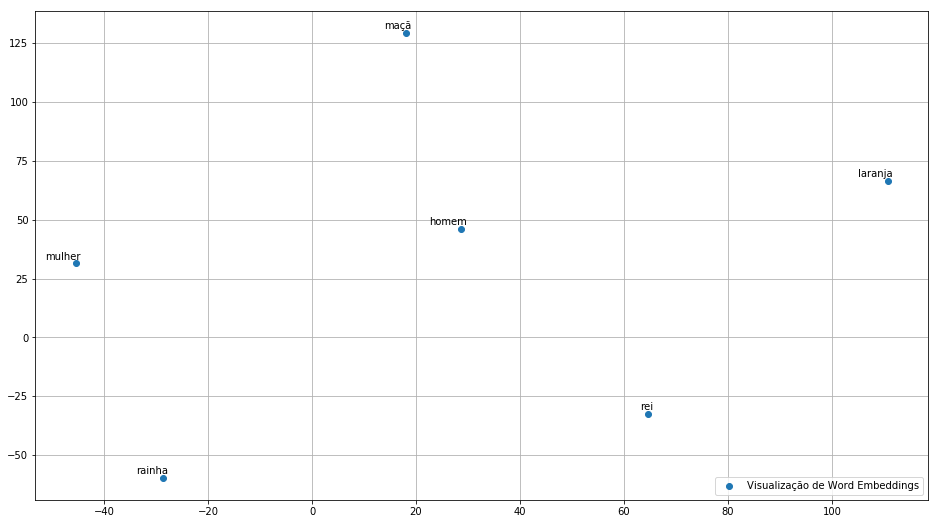

In [55]:
plot(model_glove, word_list)

In [69]:
model_jur = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove-lc_jur/s100_jur2vec-nilc-brwac_win-15-8.txt')

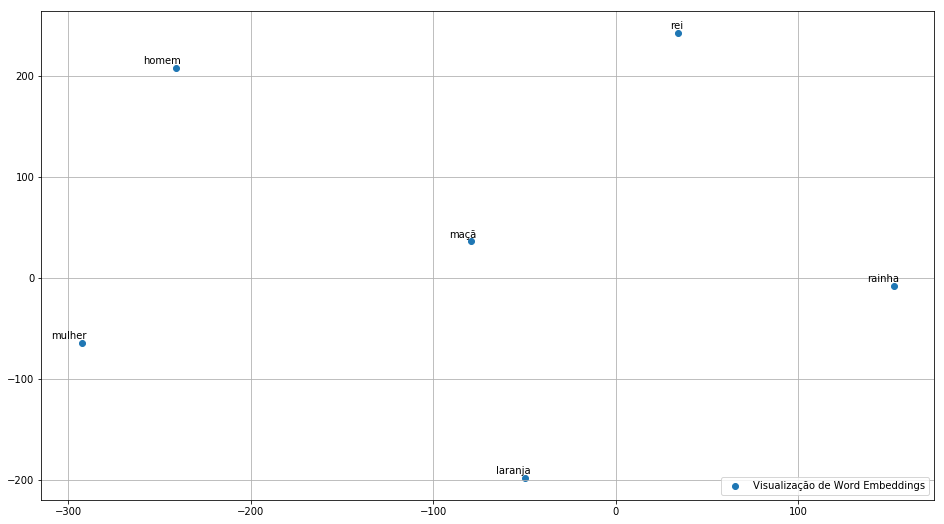

In [70]:
plot(model_jur, word_list)

In [71]:
model_jur.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('homem', 0.8246411681175232),
 ('pai', 0.740938663482666),
 ('rapaz', 0.7230043411254883),
 ('ele', 0.7077778577804565),
 ('jovem', 0.6974593997001648),
 ('marido', 0.6946495771408081),
 ('irmão', 0.6917677521705627),
 ('aquele', 0.6872537136077881),
 ('morto', 0.6872435808181763),
 ('amigo', 0.681003212928772)]

In [74]:
model_jur.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

[('rainha', 0.8096932172775269),
 ('castela', 0.701373815536499),
 ('carlota', 0.6665114164352417),
 ('papa', 0.6583917140960693),
 ('filha', 0.6512023210525513),
 ('consorte', 0.6488165855407715),
 ('imperador', 0.6419343948364258),
 ('dama', 0.6370173692703247),
 ('princesa', 0.6328068971633911),
 ('coroação', 0.6313490867614746)]

In [73]:
model_jur.most_similar(positive=['réu', 'reclamante'], negative=['autor'], topn=10)

[('reclamado', 0.9570391178131104),
 ('ré', 0.8738843202590942),
 ('reclamada', 0.8693616390228271),
 ('preposto', 0.840252161026001),
 ('ltda', 0.8228383660316467),
 ('recorrido', 0.8106067180633545),
 ('sr', 0.8012376427650452),
 ('consignante', 0.7967684864997864),
 ('epp', 0.7806806564331055),
 ('face', 0.7788323760032654)]

In [75]:
model_jur_lg = KeyedVectors.load_word2vec_format('/media/discoD/embeddings/glove-lc_jur/s300_jur2vec-nilc-brwac_win-15-7.txt')

In [76]:
model_jur_lg.most_similar(positive=['rei', 'mulher'], negative=['rainha'], topn=10)

[('homem', 0.7093941569328308),
 ('homens', 0.6013113260269165),
 ('pai', 0.596015214920044),
 ('ele', 0.5955917835235596),
 ('jovem', 0.5800420045852661),
 ('marido', 0.5741293430328369),
 ('alguém', 0.570969820022583),
 ('rapaz', 0.564946174621582),
 ('filho', 0.5589569807052612),
 ('irmão', 0.5576887726783752)]

In [77]:
model_jur_lg.most_similar(positive=['rei', 'mulher'], negative=['homem'], topn=10)

[('rainha', 0.7131105065345764),
 ('princesa', 0.5899041891098022),
 ('filha', 0.5703611969947815),
 ('esposa', 0.5490684509277344),
 ('trono', 0.5315802097320557),
 ('irmã', 0.5147283673286438),
 ('monarca', 0.5114014744758606),
 ('mãe', 0.49730005860328674),
 ('coroa', 0.4932717978954315),
 ('imperador', 0.4923623502254486)]

In [78]:
model_jur_lg.most_similar(positive=['réu', 'reclamante'], negative=['autor'], topn=10)

[('reclamado', 0.8071267008781433),
 ('reclamada', 0.770307183265686),
 ('ré', 0.7507691383361816),
 ('preposto', 0.7257888317108154),
 ('ltda', 0.6913617849349976),
 ('sr', 0.6574898362159729),
 ('recorrido', 0.6550928354263306),
 ('réus', 0.6510688066482544),
 ('consignante', 0.6407719254493713),
 ('recorrente', 0.6355892419815063)]